# WeatherPy


## Data Analysis
 * Regions at low latitudes experience higher temperatures.
 * There appears to be some correlation between high humidity and high latitude.
 * There does not seem to be any functional relationship between cloudiness and latitude. 

## Preliminary Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
# Create a preliminary DataFrame
city_weather_df = pd.DataFrame(cities, columns=['City'])

# Add empty columns
cols = ['Cloudiness', 'Country', 'Date', 'Humidity', \
        'Lat', 'Lng', 'Max Temp', 'Wind Speed']

for col in cols:
    city_weather_df[col] = ""
    
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saldanha,,,,,,,,
1,puerto penasco,,,,,,,,
2,rikitea,,,,,,,,
3,jamestown,,,,,,,,
4,east london,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?"
params = {'units': 'imperial',
          'appid': api_key,
         }

print("Beginning Data Retrieval")
print("-----------------------------")

# Indices to keep track of progress in processing 'cities'
# There are 50 records in every set
set_idx = 1
record_idx = 1

for index, row in city_weather_df.iterrows():
    
    # Extract city from DataFrame
    city = row['City']
    
    # Add city as the query parameter to params
    params['q'] = city
    
    # Perform a GET request 
    response = requests.get(base_url, params).json()
    
    try:
        print(f"Processing Record {record_idx} of Set {set_idx} | {city}")
        
        # Build a list of weather info in the same order as the list of elements in 'cols'
        weather = [response['clouds']['all'],
                   response['sys']['country'],
                   response['dt'],
                   response['main']['humidity'],
                   response['coord']['lat'],
                   response['coord']['lon'],
                   response['main']['temp_max'],
                   response['wind']['speed'],
                  ]
        
        # Add weather info to DataFrame
        for i in range(0, len(cols)):
            city_weather_df.loc[index, cols[i]] = weather[i]
                       
    except(KeyError, IndexError):
            print("City not found. Skipping...")

    # Update indices
    if record_idx < 50:
        record_idx += 1
    else:
        record_idx = 0
        set_idx += 1
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | puerto penasco
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | porbandar
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | magole
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | mwense
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | tubuala
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | kabinda
Processing Record 19 of Set 1 | lerwick
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 1 | svetlaya
Processing Record 22 of Set 1 | cidreira
Proces

Processing Record 33 of Set 4 | bukachacha
Processing Record 34 of Set 4 | saint anthony
Processing Record 35 of Set 4 | ilulissat
Processing Record 36 of Set 4 | seda
Processing Record 37 of Set 4 | toliary
City not found. Skipping...
Processing Record 38 of Set 4 | pitsunda
Processing Record 39 of Set 4 | birjand
Processing Record 40 of Set 4 | avarua
Processing Record 41 of Set 4 | lermontovka
Processing Record 42 of Set 4 | marsh harbour
Processing Record 43 of Set 4 | blagoyevo
Processing Record 44 of Set 4 | pangnirtung
Processing Record 45 of Set 4 | kasongo
Processing Record 46 of Set 4 | coria
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | quatre cocos
Processing Record 49 of Set 4 | meulaboh
Processing Record 50 of Set 4 | maxixe
Processing Record 0 of Set 5 | lavrentiya
Processing Record 1 of Set 5 | labutta
City not found. Skipping...
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | sept-iles
Processing Record 4 of S

Processing Record 14 of Set 8 | guerrero
Processing Record 15 of Set 8 | agrafa
Processing Record 16 of Set 8 | karatuzskoye
Processing Record 17 of Set 8 | suntar
Processing Record 18 of Set 8 | pangkalanbuun
Processing Record 19 of Set 8 | pisco
Processing Record 20 of Set 8 | sambava
Processing Record 21 of Set 8 | humboldt
Processing Record 22 of Set 8 | alotau
City not found. Skipping...
Processing Record 23 of Set 8 | sistranda
Processing Record 24 of Set 8 | madawaska
Processing Record 25 of Set 8 | nara
Processing Record 26 of Set 8 | kavieng
Processing Record 27 of Set 8 | mnogovershinnyy
Processing Record 28 of Set 8 | kavaratti
Processing Record 29 of Set 8 | sabzevar
Processing Record 30 of Set 8 | southbridge
Processing Record 31 of Set 8 | umm kaddadah
Processing Record 32 of Set 8 | ayan
Processing Record 33 of Set 8 | nortelandia
Processing Record 34 of Set 8 | landau
Processing Record 35 of Set 8 | esso
Processing Record 36 of Set 8 | mendahara
City not found. Skipping

Processing Record 44 of Set 11 | canoa
Processing Record 45 of Set 11 | mariakani
Processing Record 46 of Set 11 | henties bay
Processing Record 47 of Set 11 | novyy urengoy
Processing Record 48 of Set 11 | saraland
Processing Record 49 of Set 11 | salinopolis
Processing Record 50 of Set 11 | piacabucu
Processing Record 0 of Set 12 | palu
Processing Record 1 of Set 12 | port augusta
Processing Record 2 of Set 12 | port blair
Processing Record 3 of Set 12 | havre-saint-pierre
Processing Record 4 of Set 12 | kitob
Processing Record 5 of Set 12 | aranda de duero
Processing Record 6 of Set 12 | koidu
Processing Record 7 of Set 12 | ushumun
Processing Record 8 of Set 12 | road town
Processing Record 9 of Set 12 | virginia beach
Processing Record 10 of Set 12 | whitianga
Processing Record 11 of Set 12 | yumen
Processing Record 12 of Set 12 | umm lajj
Processing Record 13 of Set 12 | simao
Processing Record 14 of Set 12 | calama
Processing Record 15 of Set 12 | cayenne
Processing Record 16 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Export to .csv
city_weather_df.to_csv(output_data_file, index=False)

# Delete all empty rows - rows corresponding to the cities that 
# could not be found
city_weather_df = city_weather_df.loc[city_weather_df['Cloudiness'] != ""]

# Reset the index
city_weather_df.reindex()

# Display DataFrame
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saldanha,0,PT,1561683158,75,41.42,-6.55,63.91,3.22
1,puerto penasco,0,MX,1561683158,49,31.32,-113.53,84.99,5.99
2,rikitea,100,PF,1561683159,83,-23.12,-134.97,75.37,16.22
3,jamestown,0,AU,1561683159,60,-33.21,138.6,61.84,16.58
4,east london,0,ZA,1561683084,26,-33.02,27.91,62.09,5.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
# Need date that weather data is being drawn from
### Date in unix, UTC - pick an entry in city_weather_df
utc_date = city_weather_df['Date'][1]
dt = datetime.datetime.utcfromtimestamp(utc_date)

### Date in month/day/year format
date = f"{dt.month}/{dt.day}/{dt.year}"

#### Latitude vs. Temperature Plot

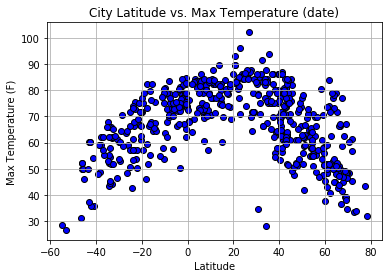

In [7]:
# x_axis = Latitude and y_axis = Temperature
temp = city_weather_df['Max Temp']
lat = city_weather_df['Lat']

# Plot and turn grid on
plt.scatter(lat, temp, facecolor='blue', edgecolor='black')
plt.grid()

# Title and axes labels
plt.title('City Latitude vs. Max Temperature (date)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save and show
plt.savefig('output_data\Images\lat_vs_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

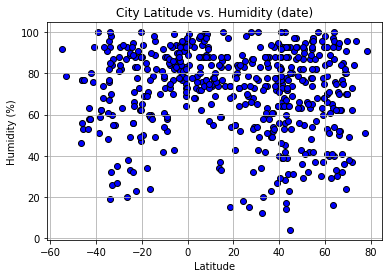

In [8]:
# x_axis = Latitude and y_axis = Humidity
humidity = city_weather_df['Humidity']
lat = city_weather_df['Lat']

# Plot and turn grid on
plt.scatter(lat, humidity, facecolor='blue', edgecolor='black')
plt.grid()

# Title and axes labels
plt.title('City Latitude vs. Humidity (date)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save and show
plt.savefig('output_data\Images\lat_vs_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

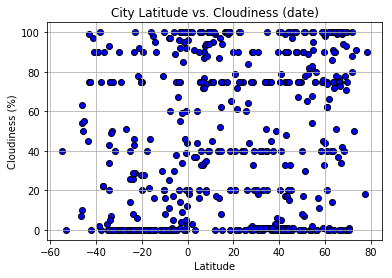

In [9]:
# x_axis = Latitude and y_axis = Cloudiness
clouds = city_weather_df['Cloudiness']
lat = city_weather_df['Lat']

# Plot and turn grid on
plt.scatter(lat, clouds, facecolor='blue', edgecolor='black')
plt.grid()

# Title and axes labels
plt.title('City Latitude vs. Cloudiness (date)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save and show
plt.savefig('output_data\Images\lat_vs_clouds.png')
plt.show()

#### Latitude vs. Wind Speed Plot

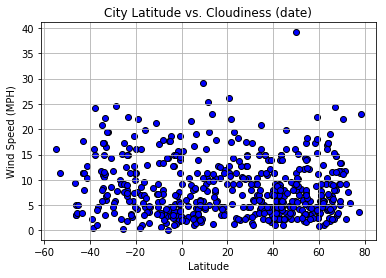

In [10]:
# x_axis = Latitude and y_axis = Wind Speed
wspeed = city_weather_df['Wind Speed']
lat = city_weather_df['Lat']

# Plot and turn grid on
plt.scatter(lat, wspeed, facecolor='blue', edgecolor='black')
plt.grid()

# Title and axes labels
plt.title('City Latitude vs. Cloudiness (date)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

# Save and show
plt.savefig('output_data\Images\lat_vs_wspeed.png')
plt.show()